# 0.0 Imports

In [57]:
import math
import pandas as pd
import inflection
import numpy as np
import seaborn as sns

from IPython.core.display import HTML

from matplotlib import pyplot as plt

## 0.1. Helper Functions

In [55]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [58]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading data

In [12]:
df_sales_0 = pd.read_csv('data/train.csv', low_memory=False)
df_store_0 = pd.read_csv('data/store.csv', low_memory=False)

In [4]:
df_merge = pd.merge(df_sales_0,df_store_0, how='left',on='Store')

# 1.0 Descrição dos dados

## 1.1. Dimensão dos Dados

In [5]:
print( 'Número de Linhas {}'.format(df_merge.shape[0]))
print( 'Número de Colunas {}'.format(df_merge.shape[1]))

Número de Linhas 1017209
Número de Colunas 18


## 1.2. Tipos de Dados

In [7]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

In [8]:
df_merge.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

## 1.3. Verificando Nan

In [10]:
df_merge.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

## 1.4. Fillout NA

## 1.5. Data Change

In [21]:
df_merge['CompetitionOpenSinceMonth'] = df_merge['CompetitionOpenSinceMonth'].astype(int)
df_merge['CompetitionOpenSinceYear']  = df_merge['CompetitionOpenSinceYear'].astype(int)

df_merge['Promo2SinceWeek']  = df_merge['Promo2SinceWeek'].astype(int)
df_merge['Promo2SinceYear']  = df_merge['Promo2SinceYear'].astype(int)

## 1.6. Estatistica Descritiva

In [52]:
atributo_numerico   = df_merge.select_dtypes( include=['int64', 'float64'] )
atributo_categorico = df_merge.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [37]:
# Tendenia Central - media, mediana
tc1 = pd.DataFrame( atributo_numerico.apply( np.mean ) ).T
tc2 = pd.DataFrame( atributo_numerico.apply( np.median ) ).T

# Dispersão - std, min, max, range, skew, kurtosis
disp1 = pd.DataFrame( atributo_numerico.apply( np.std ) ).T 
disp2 = pd.DataFrame( atributo_numerico.apply( min ) ).T 
disp3 = pd.DataFrame( atributo_numerico.apply( max ) ).T 
disp4 = pd.DataFrame( atributo_numerico.apply( lambda x: x.max() - x.min() ) ).T 
disp5 = pd.DataFrame( atributo_numerico.apply( lambda x: x.skew() ) ).T 
disp6 = pd.DataFrame( atributo_numerico.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [disp2, disp3, disp4, tc1, tc2, disp1, disp5, disp6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,Store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,DayOfWeek,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,Sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,Customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,Open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,Promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,SchoolHoliday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,CompetitionDistance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,CompetitionOpenSinceMonth,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,CompetitionOpenSinceYear,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/home/valmadson/.pyenv/versions/3.9.2/envs/airbnbpredictfirstbooking/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompetitionDistance'>

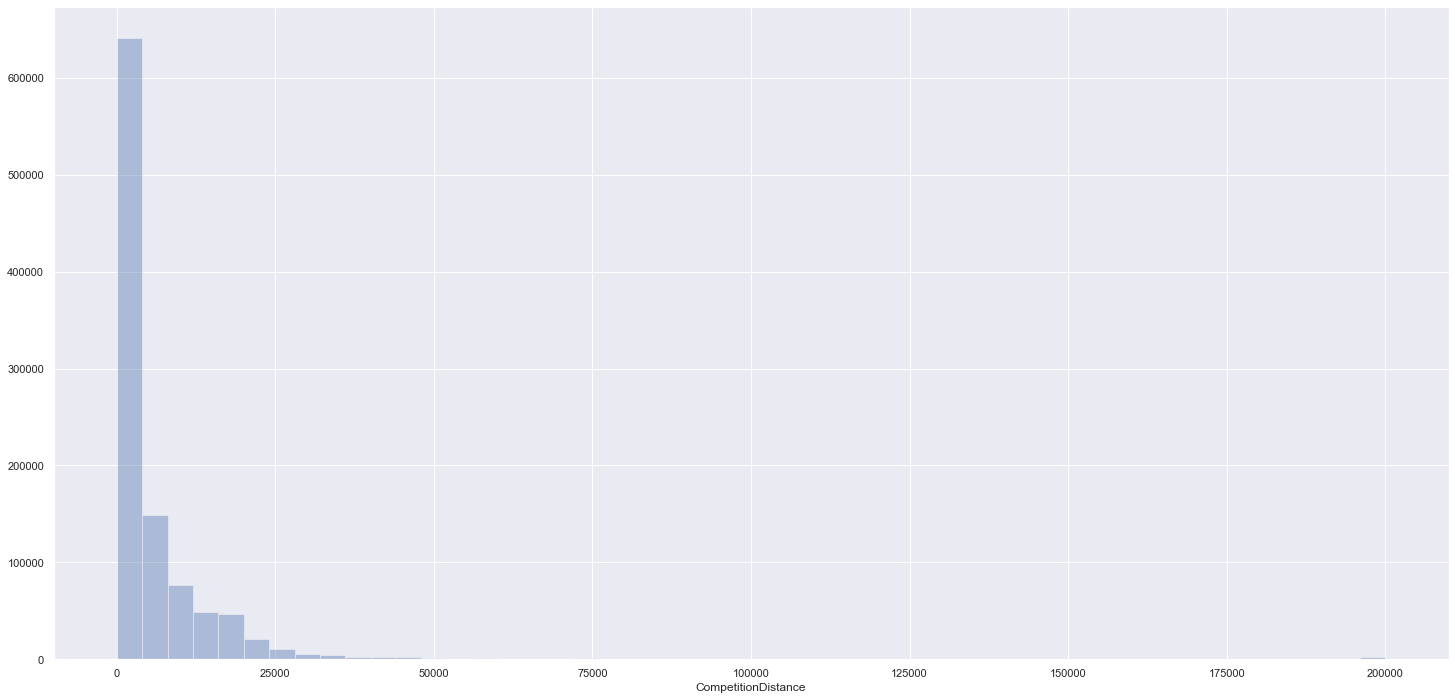

In [59]:
sns.distplot( df_merge['CompetitionDistance'], kde=False )

In [54]:
# Exibição dos atributos categoricos
atributo_categorico.apply( lambda x: x.unique().shape[0] )

StateHoliday      4
StoreType         4
Assortment        3
PromoInterval     4
month_map        12
dtype: int64

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

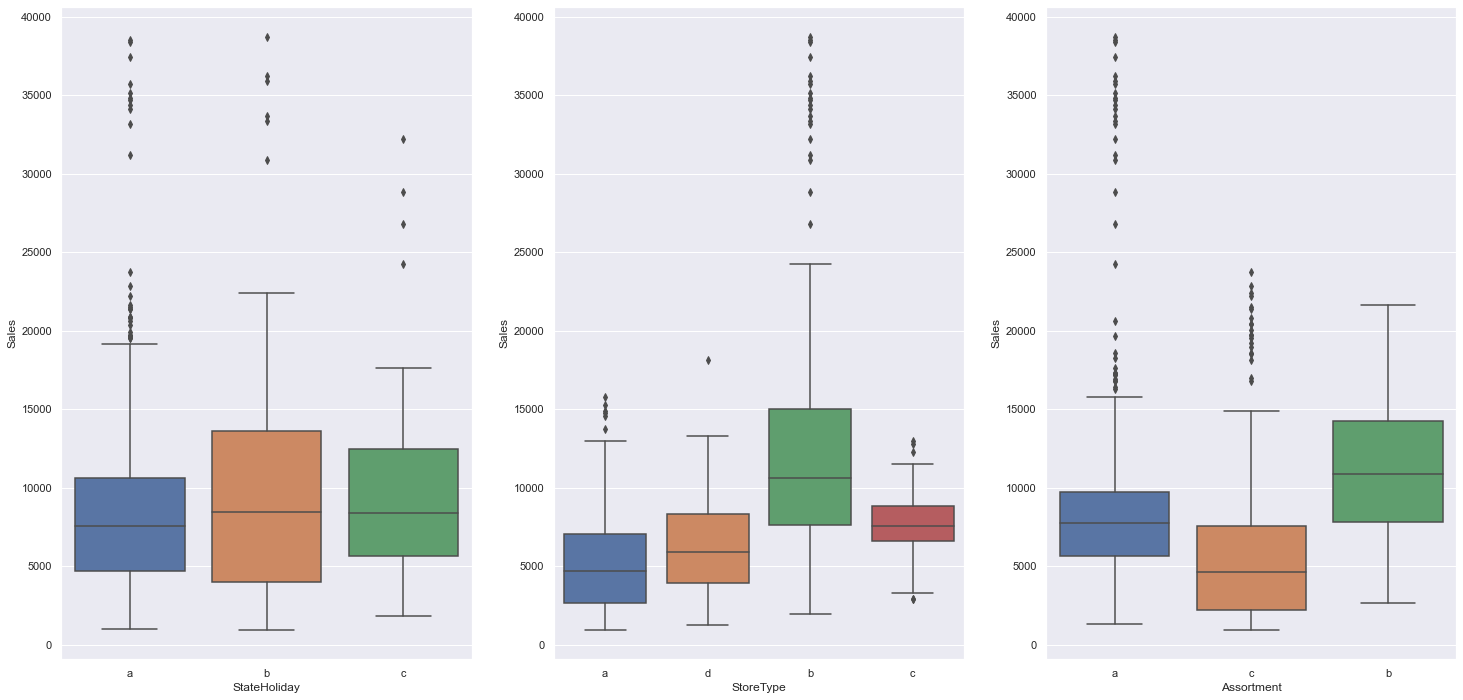

In [60]:
# Divisão das vendas em relação algumas variaveis categóricas
aux = df_merge[(df_merge['StateHoliday'] != '0') & (df_merge['Sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='StateHoliday', y='Sales', data=aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='StoreType', y='Sales', data=aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='Assortment', y='Sales', data=aux )